<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [2]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [3]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2024-04-04 15:33:32--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2024-04-04 15:33:32--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.006s  

2024-04-04 15:33:32 (9.13 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2024-04-04 15:33:32--
Total wall clock time: 0.2s
Downloaded: 1 files, 60K in 0.006s (9.13 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

# Cargar el dataset
df = pd.read_csv('titanic.csv')

des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_nuevo = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df_nuevo.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

df_sin_faltantes = df_nuevo.dropna()

# Verificar si quedan filas con valores faltantes después de la eliminación
df_sin_faltantes.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [8]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df_sin_faltantes.shape[0]


714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [9]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_sin_faltantes.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó

# Contar el número de personas que sobrevivieron
num_sobrevivieron = df_nuevo[df_nuevo['Survived'] == 1].shape[0]

# Contar el número de personas que no sobrevivieron
num_no_sobrevivieron = df_nuevo[df_nuevo['Survived'] == 0].shape[0]

print(f"Personas que sobrevivieron: {num_sobrevivieron}")
print(f"Personas que no sobrevivieron: {num_no_sobrevivieron}")


Personas que sobrevivieron: 342
Personas que no sobrevivieron: 549


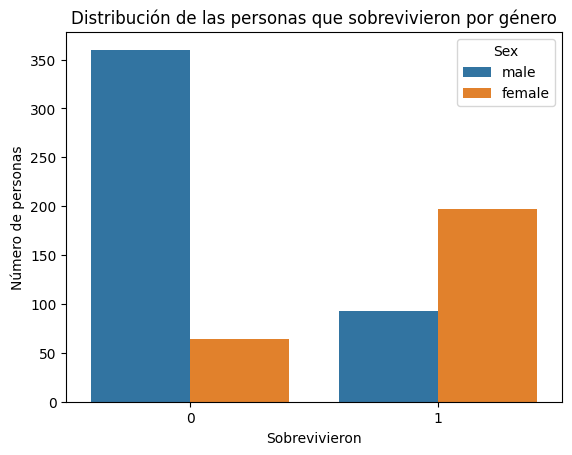

In [11]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

# Crear el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Survived', hue='Sex', data=df_sin_faltantes)

# Añadir título y etiquetas a los ejes
plt.title('Distribución de las personas que sobrevivieron por género')
plt.xlabel('Sobrevivieron')
plt.ylabel('Número de personas')

plt.show()


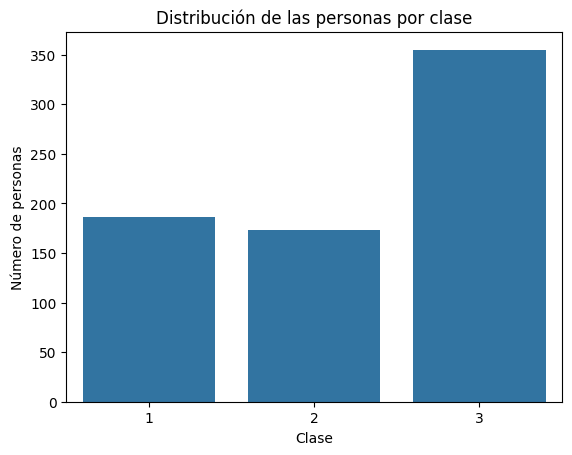

In [12]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot


sns.countplot(x='Pclass', data=df_sin_faltantes)


plt.title('Distribución de las personas por clase')
plt.xlabel('Clase')
plt.ylabel('Número de personas')

plt.show()


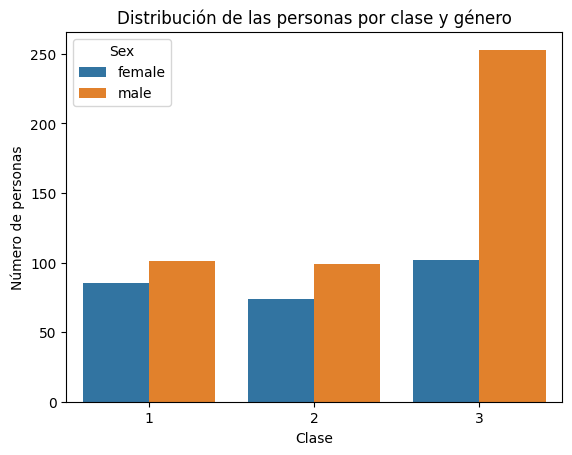

In [13]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"

sns.countplot(x='Pclass', hue='Sex', data=df_sin_faltantes)


plt.title('Distribución de las personas por clase y género')
plt.xlabel('Clase')
plt.ylabel('Número de personas')

plt.show()


#### Transformar variables categóricas texto a clases numeradas

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
# Crear una copia del DataFrame original
df_cod = df_sin_faltantes.copy()


In [16]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!

# Crear un objeto LabelEncoder
le_sex = LabelEncoder()

# Ajustar y transformar la columna 'Sex'
df_cod['Sex'] = le_sex.fit_transform(df_cod['Sex'])

df_cod.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [17]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)

print("Clases detectadas por el encoder:", le_sex.classes_)


Clases detectadas por el encoder: ['female' 'male']


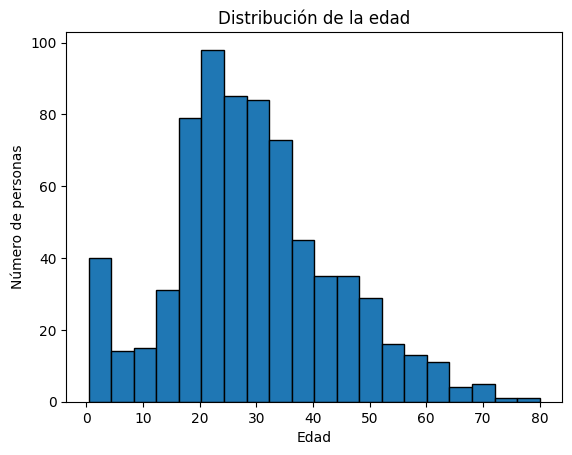

Media de la edad: 29.69911764705882
Mediana de la edad: 28.0
Desviación estándar de la edad: 14.526497332334042


In [18]:
# Alumno: Analizar la distribución de la edad


# Crear un histograma de la columna 'Age'
plt.hist(df_cod['Age'], bins=20, edgecolor='k')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Número de personas')

# Mostrar el gráfico
plt.show()

print("Media de la edad:", df_cod['Age'].mean())
print("Mediana de la edad:", df_cod['Age'].median())
print("Desviación estándar de la edad:", df_cod['Age'].std())
# Verificar si hay valores faltantes en la columna 'Age'
#print("Número de valores faltantes en 'Age':", df_cod['Age'].isnull().sum())


In [19]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_cod.copy()
df_cod.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [20]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler_age = StandardScaler()

# Ajustar y transformar la columna 'Age'
df_cod['Age'] = scaler_age.fit_transform(df_cod['Age'].values.reshape(-1, 1))

# Verificar el resultado
df_cod.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.530377,1,0
1,1,1,0,0.571831,1,0
2,1,3,0,-0.254825,0,0
3,1,1,0,0.365167,1,0
4,0,3,1,0.365167,0,0


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [21]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

# Seleccionar todas las columnas excepto 'Survived' y convertir a array de NumPy
X = df_cod.drop('Survived', axis=1).to_numpy()

# Seleccionar la columna 'Survived' y convertir a array de NumPy
y = df_cod['Survived'].to_numpy()


print("Array y (etiquetas):", y)
print("Array X (características):", X)

Array y (etiquetas): [0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 0

In [22]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape

in_shape = X.shape[1]

in_shape


5

In [23]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea

out_shape = 1



Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [24]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta

# Crear el modelo secuencial
modelo = Sequential()

# Añadir la capa oculta con 10 neuronas y función de activación ReLU
modelo.add(Dense(10, input_shape=(in_shape,), activation='relu'))

# Añadir la capa de salida con 1 neurona (para la clasificación binaria) y función de activación sigmoide
modelo.add(Dense(out_shape, activation='sigmoid'))

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Imprimir la arquitectura del modelo
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"


modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"

# Entrenar el modelo con un 20% para el conjunto de validación
history = modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

history

Epoch 1/10
15/15 [==============================] - 3s 18ms/step - loss: 0.7443 - accuracy: 0.5132 - val_loss: 0.7200 - val_accuracy: 0.5043
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.7277 - accuracy: 0.5570 - val_loss: 0.7099 - val_accuracy: 0.5217
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5746 - val_loss: 0.7001 - val_accuracy: 0.5739
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.5877 - val_loss: 0.6914 - val_accuracy: 0.5739
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5965 - val_loss: 0.6840 - val_accuracy: 0.5739
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6771 - accuracy: 0.6031 - val_loss: 0.6769 - val_accuracy: 0.5913
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6667 - accuracy: 0.6206 - val_loss: 0.6702 - val_accuracy: 0.6000
Epoch 8/10
15/15 [=

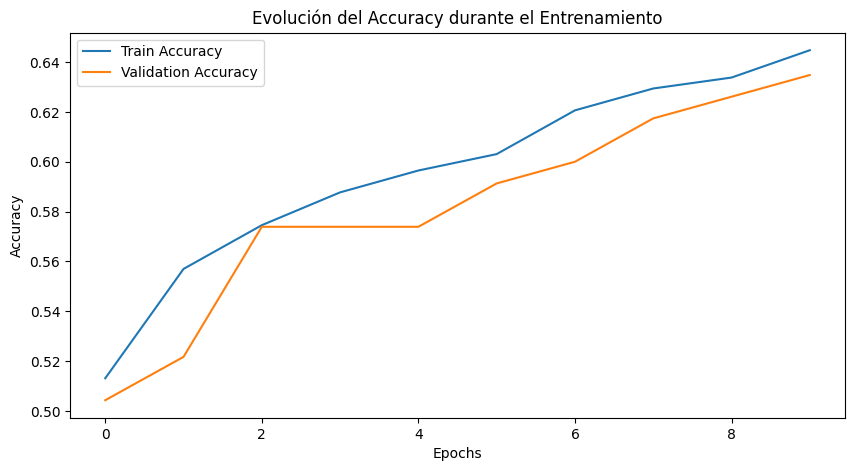

In [28]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line


plt.figure(figsize=(10, 5))

# Accuracy en el conjunto de entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Accuracy en el conjunto de validación
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Configurar el gráfico
plt.title('Evolución del Accuracy durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar el gráfico
plt.show()


In [29]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test

# Realizar la predicción con el conjunto de datos de prueba
y_hat_prob = modelo.predict(X_test)

# Imprimir las primeras predicciones para verificar
print("Primeras predicciones de probabilidad de sobrevivir:", y_hat_prob[:5])

# Convertir las probabilidades en etiquetas de clase
y_hat = (y_hat_prob > 0.5).astype(int)

# Imprimir las primeras etiquetas de clase para verificar
print("Primeras etiquetas de clase:", y_hat[:5])


5/5 [==============================] - 0s 2ms/step
Primeras predicciones de probabilidad de sobrevivir: [[0.3401083 ]
 [0.56305045]
 [0.3592618 ]
 [0.49815166]
 [0.28402156]]
Primeras etiquetas de clase: [[0]
 [1]
 [0]
 [0]
 [0]]


In [30]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat


y_hat = (y_hat_prob >= 0.5).astype(int)


print("Primeras etiquetas de clase:", y_hat[:5])

Primeras etiquetas de clase: [[0]
 [1]
 [0]
 [0]
 [0]]


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [31]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)

print("Exactitud del modelo:", accuracy)


Exactitud del modelo: 0.6783216783216783


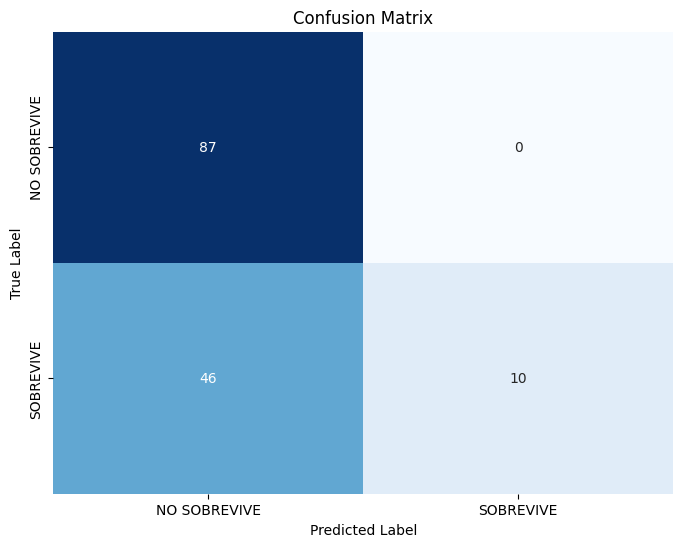

In [32]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_hat)

# Define display labels
display_labels = ['NO SOBREVIVE', 'SOBREVIVE']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [38]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo



Pclass = 2
Sex = 'male'
Age = 29
SibSp = 2
Parch = 0

# Casteamos el array que devuelve le.transform a int
sex_encoded = int(le_sex.transform([Sex]))
# Normalizar la edad con el normalizador
age_norm = float(scaler_age.transform([[Age]]))
# Crear el array de entrada
X_prueba = np.array([Pclass, sex_encoded, age_norm, SibSp, Parch])
# El sistema espera 1 fila y N columnas, hay que hacer reshape
X_prueba = X_prueba.reshape(1, -1)
y_prueba = float(modelo.predict(X_prueba))

if y_prueba >= 0.5:
    print('Sobrevivio!')
else:
    print('Muerte')

print('Probabilidad de haber sobrevivido:', y_prueba)



1/1 [==============================] - 0s 18ms/step
Muerte
Probabilidad de haber sobrevivido: 0.2031181901693344


<ipython-input-38-0f4f57c0e146>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex_encoded = int(le_sex.transform([Sex]))
<ipython-input-38-0f4f57c0e146>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_norm = float(scaler_age.transform([[Age]]))
<ipython-input-38-0f4f57c0e146>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_prueba = float(modelo.predict(X_prueba))
